In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/diabetes2.csv')

In [6]:
# Check some rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
# Check types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Check Null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Create X (features) and y (target: Outcome)
y = df['Outcome']
X = df.drop('Outcome',axis=1)


In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
# Now here we can apply a feature selection method in order to have columns which are most important for the model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features= SelectKBest(score_func=chi2, k=8)
features_selected= features.fit(X_train,y_train)
features_selected.scores_

array([  59.40982207, 1062.22411811,   31.77849957,   20.60074206,
       1631.90768236,  102.10277078,    2.95887202,  173.35841672])

In [12]:
feature_df= pd.DataFrame(features_selected.scores_,columns=['Scores'],index=X_train.columns)
feature_df

,Scores
Pregnancies,59.409822
Glucose,1062.224118
BloodPressure,31.778500
SkinThickness,20.600742
Insulin,1631.907682
BMI,102.102771
DiabetesPedigreeFunction,2.958872
Age,173.358417


In [13]:
# Find top 5
feature_df.nlargest(5,'Scores')

,Scores
Insulin,1631.907682
Glucose,1062.224118
Age,173.358417
BMI,102.102771
Pregnancies,59.409822


**Dropped the columns with low CHi2 scores**

In [14]:
# Crop 3 columns with lowest scores from X_train and X_test
columns_to_drop=['DiabetesPedigreeFunction', 'SkinThickness', 'BloodPressure']
X_train = X_train.drop(columns_to_drop,axis=1)
X_test = X_test.drop(columns_to_drop,axis =1)# try it yourself

In [15]:
# Check the shape of X train and X test
X_train.shape,X_test.shape


((537, 5), (231, 5))

In [16]:
# Find the counts for different values in y train (use value_counts())
counts = y_train.value_counts()
print(counts)

Outcome
0    349
1    188
Name: count, dtype: int64


In [18]:
# Check if the dataset is balanced?
balanced= (counts.min()/counts.max()) >= 0.8

print(f"is the dataset balanced- {balanced}")

is the dataset balanced- False


188


In [19]:
#since the class is not balanced we will apply SMOTE  here in order to balance it
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

In [20]:
# Recheck if the dataset is balanced
y_resampled.value_counts()

Outcome
0    349
1    349
Name: count, dtype: int64

In [21]:
# LOGISTIC REGRESSION with X_resampled,y_resampled
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_resampled, y_resampled)        # fit the model

In [22]:
# Predict
y_pred = lr.predict(X_test)

In [23]:
# Print some predicted values
print(y_pred[:5])

[0 0 0 0 1]


In [24]:
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6926406926406926
Precision: 0.5454545454545454
Recall: 0.675
F1-score: 0.6033519553072625


In [26]:
# Check the score of the model
model.score(X_resampled,y_resampled)

0.7478510028653295

**GRIDSEARCHCV**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
logreg=LogisticRegression(max_iter=10000, solver='liblinear')
logreg_cv=GridSearchCV(logreg,param_grid,cv=10, scoring = 'accuracy')
logreg_cv.fit(X_resampled,y_resampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1'}
accuracy : 0.7491925465838509


In [28]:
# Run a new model with the GridsearchCV output
lr_tuned =LogisticRegression(C = 0.1, penalty='l1', max_iter=10000, solver='liblinear')

model_tuned = lr_tuned.fit(X_resampled, y_resampled)

y_tuned_pred = lr_tuned.predict(X_test)

In [29]:
accuracy_tuned = accuracy_score(y_test, y_tuned_pred)
precision_tuned = precision_score(y_test, y_tuned_pred)
recall_tuned = recall_score(y_test, y_tuned_pred)
f1_tuned = f1_score(y_test, y_tuned_pred)

In [30]:
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)

Accuracy: 0.7012987012987013
Precision: 0.5533980582524272
Recall: 0.7125
F1-score: 0.6229508196721311


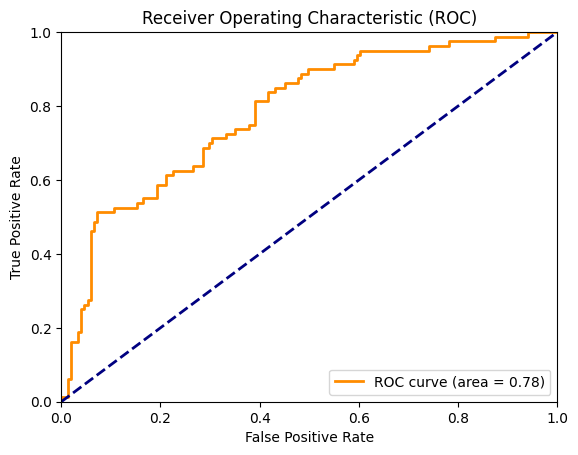

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ROC and confusion matrix
y_tuned_pred_prob = model_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_tuned_pred_prob)

# Calculate the area under the curve (AUC)
roc_auc_tuned = roc_auc_score(y_test, y_tuned_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


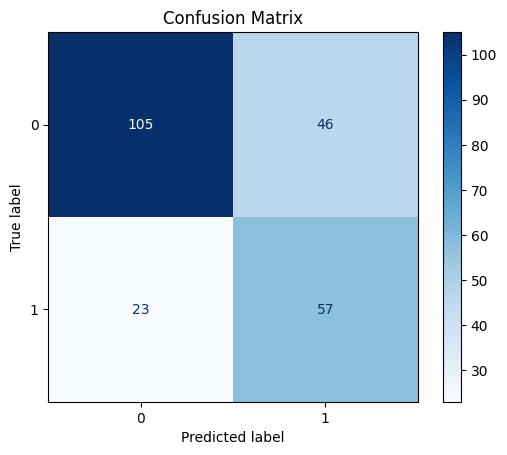

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test is your actual target values and y_pred are the predicted values
y_pred = model_tuned.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
